In [69]:
import numpy as np
import matplotlib.pyplot as plt
import time

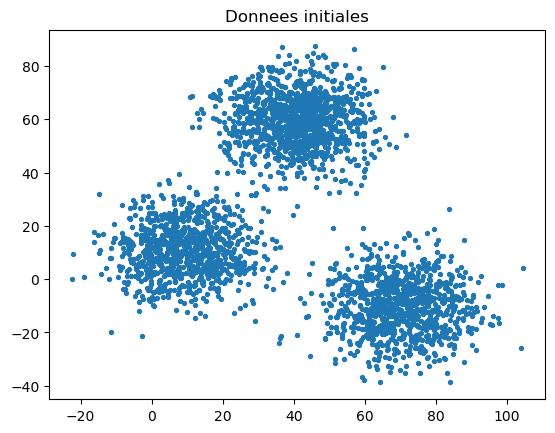

In [70]:
from scipy.io import arff

path = './artificial/'
databrut = arff.loadarff(open(path + "xclara.arff","r"))
data = [[x[0], x[1]] for x in databrut[0]]

f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

plt.scatter(f0, f1, s=8)
plt.title("Donnees initiales")
plt.show()

appel de K-Means pour une valeur fixee de k

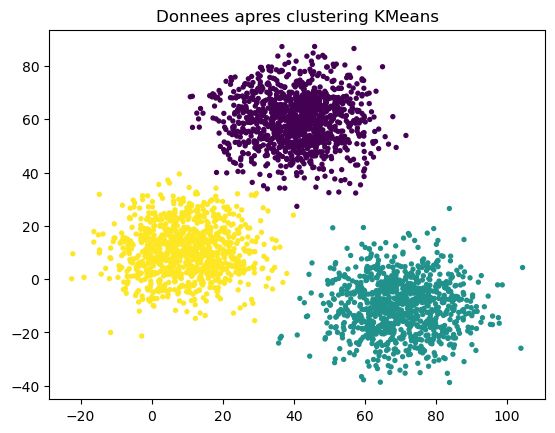

nb clusters =  3 , nb iter =  3 , runtime =  58.03  ms


In [71]:
from sklearn import cluster
datanp = data
def kmean(k,datanp):
    tps1 = time.time()

    model = cluster.KMeans(n_clusters = k, init = 'k-means++')

    model.fit(datanp)
    tps2 = time.time()
    labels = model.labels_
    iteration = model.n_iter_
    return labels,tps1,tps2,iteration

k=3
labels,tps1,tps2,iteration = kmean(k,data)
labelsKMean = labels
plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

# <u>2.2: utilisation de scikitlearn</u>

On retourne sur notre dataset de base

In [72]:
path = './artificial/'
databrut = arff.loadarff(open(path + "xclara.arff","r"))
data = [[x[0], x[1]] for x in databrut[0]]

f0 = [f[0] for f in data]
f1 = [f[1] for f in data]
datanp = data

test de silhouette

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...


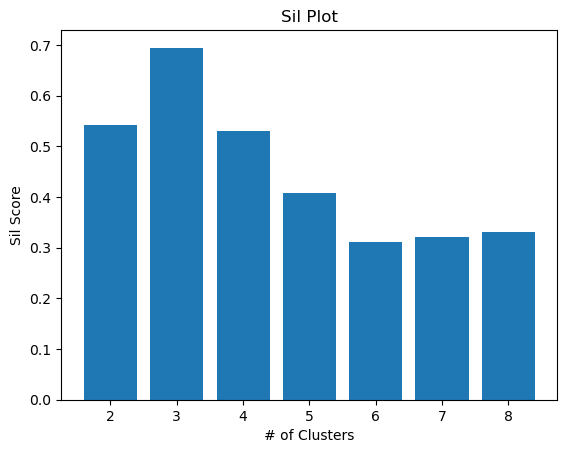

nb clusters =  3 , runtime =  1040.15  ms


In [73]:
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
sil_score_list = []
tps1 = time.time()
min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    km = KMeans(n_clusters=i)
    km.fit(datanp)
    sil = silhouette_score(np.array(datanp),km.predict(datanp))
    sil_score_list.append(sil)
tps2 = time.time()
plt.bar([i for i in range(2,len(sil_score_list)+2)],sil_score_list)
plt.title('Sil Plot')
plt.xlabel('# of Clusters')
plt.ylabel('Sil Score')
plt.show()
nbMax = np.max(sil_score_list)
indexMax = sil_score_list.index(nbMax) + min_cluster
print("nb clusters = ",indexMax, ", runtime = ",round((tps2-tps1)*1000,2)," ms")

# <u>2.3 recherche de dataset où k-means est non efficace :</u>

pour les jeux de données en spiral, en rings et en smile, la méthode k-means va avoir du mal a déterminer les clusters :

SPIRAL :

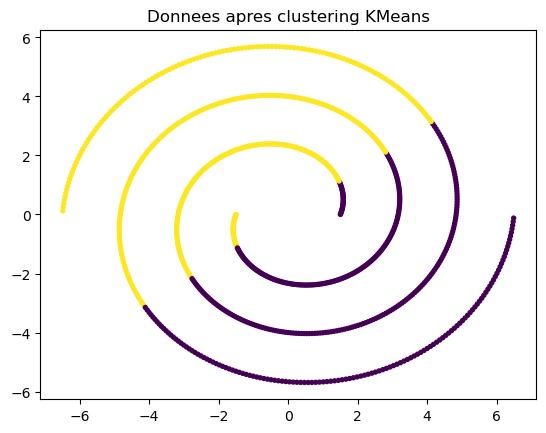

nb clusters =  2 , nb iter =  9 , runtime =  34.78  ms


In [74]:
path = './artificial/'
databrut = arff.loadarff(open(path + "spiral.arff","r"))
data = [[x[0], x[1]] for x in databrut[0]]

f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

k=2
labels,tps1,tps2,iteration = kmean(k,data)

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

RINGS

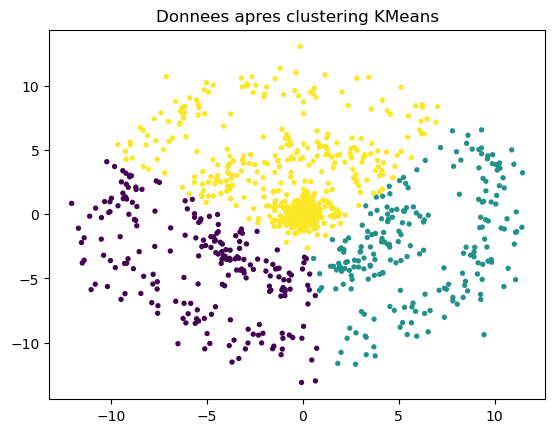

nb clusters =  3 , nb iter =  11 , runtime =  35.53  ms


In [75]:
path = './artificial/'
databrut = arff.loadarff(open(path + "rings.arff","r"))
data = [[x[0], x[1]] for x in databrut[0]]

f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

k=3
labels,tps1,tps2,iteration = kmean(k,data)

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

SMILE1

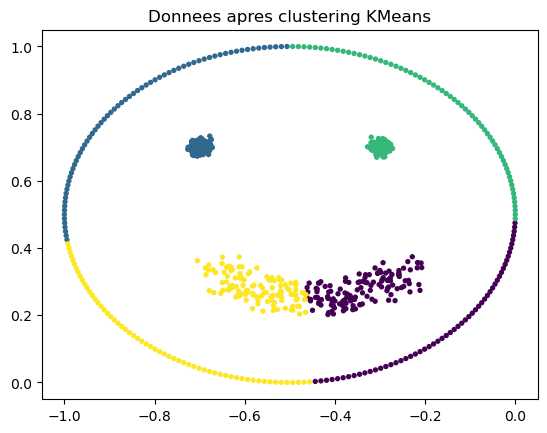

nb clusters =  4 , nb iter =  4 , runtime =  34.65  ms


In [76]:
path = './artificial/'
databrut = arff.loadarff(open(path + "smile1.arff","r"))
data = [[x[0], x[1]] for x in databrut[0]]

f0 = [f[0] for f in data]
f1 = [f[1] for f in data]

k=4
labels,tps1,tps2,iteration = kmean(k,data)

plt.scatter(f0, f1, c=labels, s=8)
plt.title("Donnees apres clustering KMeans")
plt.show()
print("nb clusters = ",k,", nb iter = ",iteration,", runtime = ",round((tps2-tps1)*1000,2)," ms")

# <u>Kmedoids :</u>

dataset initial

In [77]:
path = './artificial/'
databrut = arff.loadarff(open(path + "xclara.arff","r"))
data = [[x[0], x[1]] for x in databrut[0]]

f0 = [f[0] for f in data]
f1 = [f[1] for f in data]
datanp = data

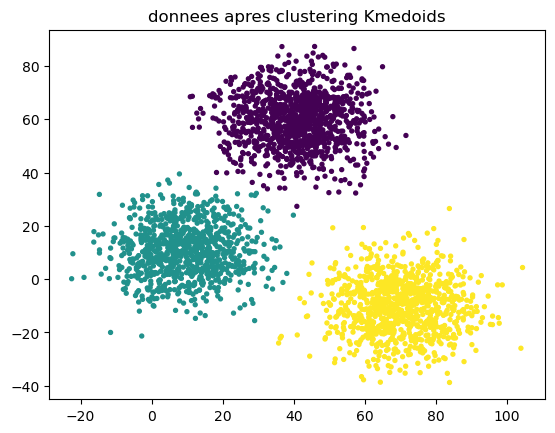

nb clusters =  4 , nb iter =  2 ,runtime =  97.5  ms


In [78]:
import kmedoids
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import manhattan_distances

def kmedoid(k,data):
    tps1 = time.time()
    distmatrix = euclidean_distances(data)
    fp = kmedoids.fasterpam(distmatrix,k)
    tps2 = time.time()
    iter_kmed=fp.n_iter
    labels_kmed = fp.labels
    return labels_kmed,tps1,tps2,iter_kmed

labels_kmed,tps1,tps2,iter_kmed = kmedoid(3,datanp)
labelsKMedoids = labels_kmed
plt.scatter(f0,f1,c=labels_kmed,s=8)
plt.title("donnees apres clustering Kmedoids")
plt.show()

print("nb clusters = ",k,", nb iter = ",iter_kmed,",runtime = ",round((tps2-tps1)*1000,2)," ms")

In [79]:
silhouette_score(np.array(datanp),labels_kmed)

0.6945587736089913

Training 2 cluster algo...
Training 3 cluster algo...
Training 4 cluster algo...
Training 5 cluster algo...
Training 6 cluster algo...
Training 7 cluster algo...
Training 8 cluster algo...


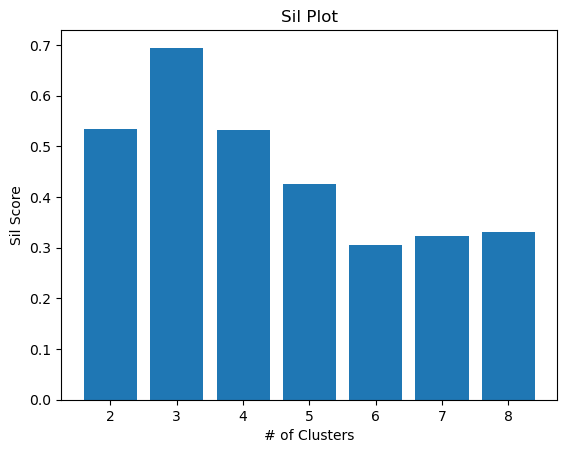

nb clusters =  3 , runtime =  1450.36  ms


In [80]:
from sklearn.metrics import silhouette_score

sil_score_list = []
tps1 = time.time()
min_cluster = 2
max_cluster = 9
for i in range(min_cluster,max_cluster):
    print('Training {} cluster algo...'.format(i))
    sil = silhouette_score(np.array(datanp),kmedoid(i,datanp)[0])
    sil_score_list.append(sil)
tps2 = time.time()
plt.bar([i for i in range(2,len(sil_score_list)+2)],sil_score_list)
plt.title('Sil Plot')
plt.xlabel('# of Clusters')
plt.ylabel('Sil Score')
plt.show()
nbMax = np.max(sil_score_list)
indexMax = sil_score_list.index(nbMax) + min_cluster
print("nb clusters = ",indexMax, ", runtime = ",round((tps2-tps1)*1000,2)," ms")

In [81]:
from sklearn.metrics import rand_score
from sklearn.metrics import mutual_info_score

print(rand_score(labelsKMean,labelsKMedoids))
print(mutual_info_score(labelsKMean,labelsKMedoids))

1.0
1.0929325398637173


# Clustering agglomératif